In [123]:
#firstly import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
pd.set_option('display.max_columns',None)
#Read in data
df = pd.read_csv('movies.csv.zip')


In [124]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [125]:
#checking missing data

for i in df.columns:
  pct_missing=np.mean(df[i].isnull())
  print('{} - {}%'.format(i,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [126]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [127]:
#df['budget']=df['budget'].astype('int64')
df['budget']=df['budget'].fillna('0')
#df['budget']=df['budget'].fillna(0)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].fillna('0')
df['gross']=df['gross'].astype('int64')


In [128]:
df['released']=df['released'].fillna('0')
df['yearCorrect']=df['released'].astype('str')

df['newYear']= df['yearCorrect'].str.extract(r'(\d{4})')

df.dtypes
#print(type(df['yearCorrect'].iloc[0]))  # Should be str
  
  

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearCorrect     object
newYear         object
dtype: object

In [129]:
df.isna().sum()
df=df.sort_values(by=['gross'],inplace=False, ascending=False)

In [130]:
!pip install scipy

In [131]:
#Dropping duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,newYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States)",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States)",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)",2018


In [132]:
df.head()
#budget
#company

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,newYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States)",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States)",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)",2018


<function matplotlib.pyplot.show(close=None, block=None)>

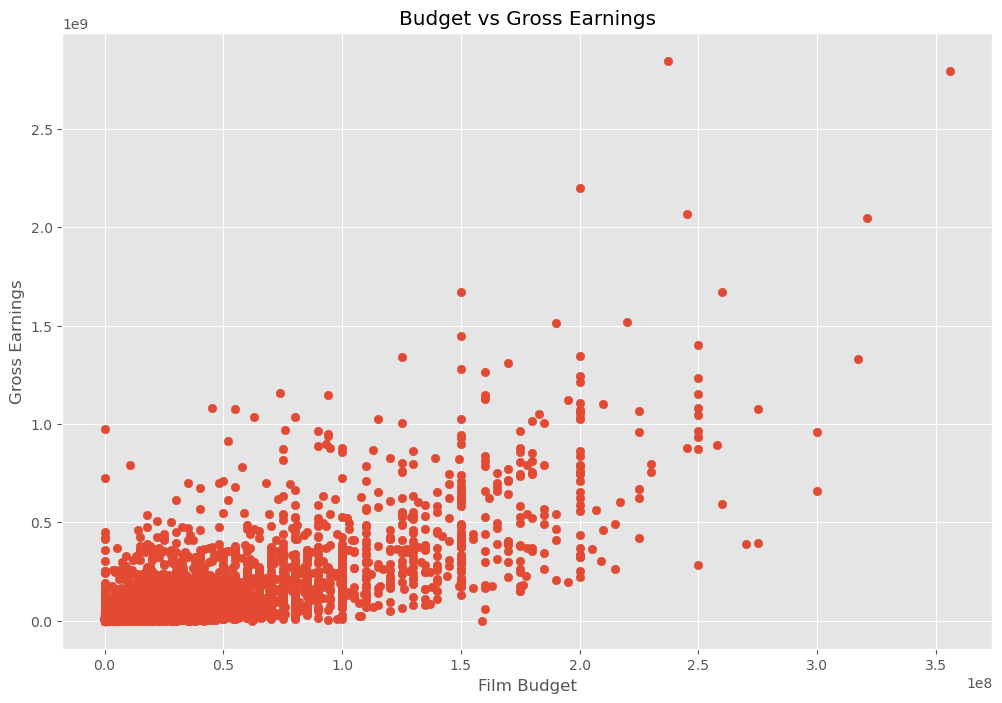

In [133]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

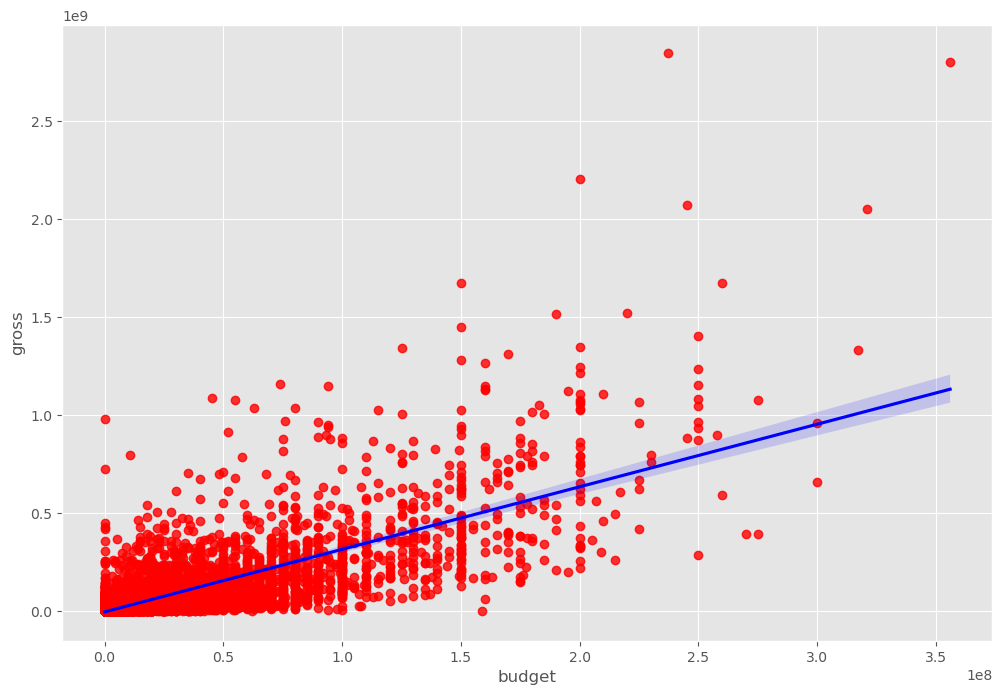

In [134]:
#Linear regression for correlation using seaborn

sns.regplot(x="budget",y="gross",data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [135]:
#Looking at the correlation
df.corr(method="pearson", numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


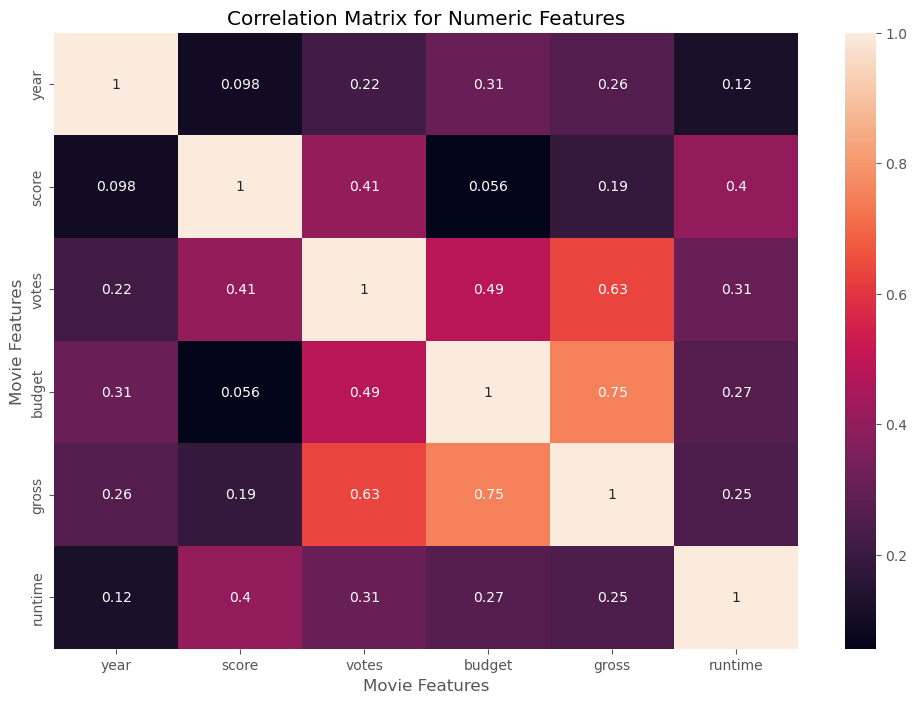

In [136]:

correlation_matrix = df.corr(method="pearson", numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [137]:
#Company Correlation to Gross
#Company is an object data that we will numeralize

df_numeralize = df
for i in df_numeralize.columns:
  if(df_numeralize[i].dtype=='object'):
    df_numeralize[i]=df_numeralize[i].astype('category')
    df_numeralize[i]=df_numeralize[i].cat.codes
df_numeralize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,newYear
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,697,29
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,184,39
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,705,17
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,699,35
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,193,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2965,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,2965,40
7664,1678,-1,4,2020,1108,4.7,36.0,774,2614,1886,55,0,0,539,90.0,1108,40
7665,4717,-1,6,2020,194,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,194,40
7666,2843,-1,6,2020,2818,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,2818,40


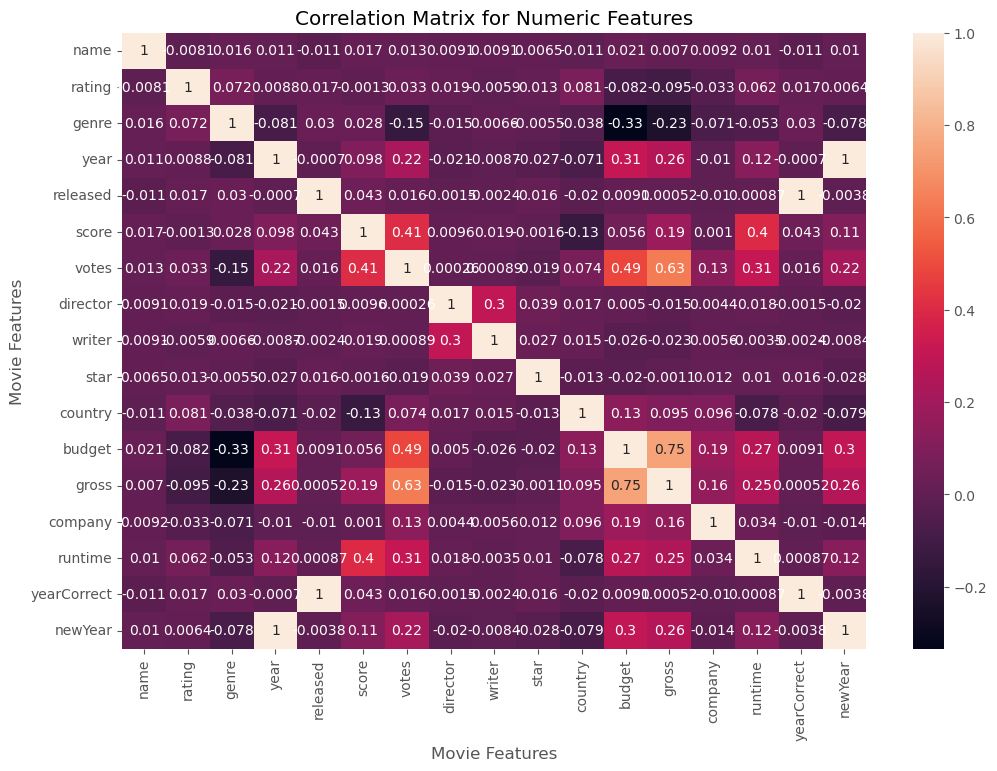

In [138]:
correlation_matrix = df_numeralize.corr(method="pearson", numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [139]:
correlation_mat= df_numeralize.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

name     name           1.000000
         rating        -0.008069
         genre          0.016355
         year           0.011453
         released      -0.011311
                          ...   
newYear  gross          0.255130
         company       -0.014144
         runtime        0.120636
         yearCorrect   -0.003775
         newYear        1.000000
Length: 289, dtype: float64

In [140]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.334021
genre    budget    -0.334021
         gross     -0.234297
gross    genre     -0.234297
genre    votes     -0.145307
                      ...   
runtime  runtime    1.000000
company  company    1.000000
year     year       1.000000
genre    genre      1.000000
name     name       1.000000
Length: 289, dtype: float64

In [141]:
high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
newYear      year           0.996397
year         newYear        0.996397
yearCorrect  yearCorrect    1.000000
             released       1.000000
rating       rating         1.000000
newYear      newYear        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     yearCorrect    1.000000
             released       1.000000
runtime      runtime        1.000000
company      company        1.000000
year         year           1.000000
genre        genre          1.000000
name         name           1.000000
dtype: float64

In [142]:
#votes and budget have the highest correlation to gross earnings
